# `numpy` and `scipy`

## Tasks

1. Find the function in `scipy.stats.norm` that produces an array of randomly distributed numbers from a normal (Gaussian) distribution. You might need to check online on how to use it in the [scipy documentation](https://docs.scipy.org/doc/scipy/reference/) web-page.
2. Plot the arrays generated by this function as a set of histograms
3. Find the function that fits a set of data to a normal distribution and make a dataframe of the results when your generated data is fitted
4. Plot the following:
    - x-value: number of points generated from the distribution (e.g. 5, 10, 15, 20)
    - y-value: percentage difference between expected mean and measured mean using the fitting function

5. Do steps 3-5 with another distribution e.g. `scipy.stats.poisson`

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

x: (-0.006331787959722066, 0.10608665370886514)
y: (5.9977757994249785, 1.0528691227150875)
z: (-2.2299416952031073, 8.976702594490263)


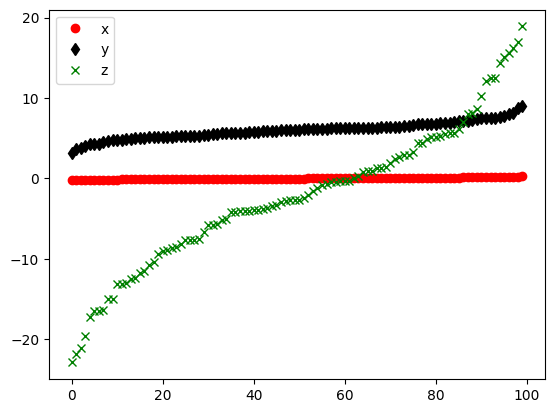

In [4]:

# Use scipy.stats.norm.rvs to generate some data
w = norm.rvs(size=100)

# plot 3 examples using norm.rvs
fig, ax = plt.subplots()

x = sorted(norm.rvs(size=100, loc=0, scale=0.1))
y = sorted(norm.rvs(size=100,loc=6, scale=1))
z = sorted(norm.rvs(size=100,loc=-2, scale=10))

# use zip to iteratively plot the data
for data, format , label in zip(
    [x, y, z], 
    ['ro', 'kd', 'gx'], 
    ['x', 'y', 'z']
):
    ax.plot(data, format, label=label)
    # Use norm.fit to fit'kd the data you have just generated
    print(f"{label}: {norm.fit(data)}")

# add legend
plt.legend()
plt.show()

[ 31  34  37  40  43  47  50  55  59  64  69  75  81  88  96 104 112 121
 132 142 154 167 181 196 212 230 249 269 292 316]


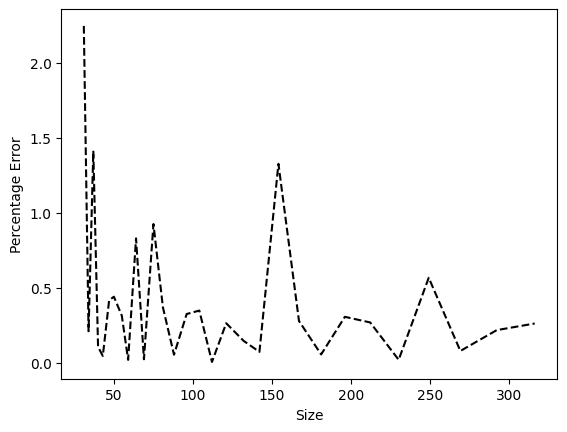

In [6]:
# Initialise needed values i.e. size, loc and scale
sizes = np.logspace(1.5, 2.5, num=30, dtype=int)
loc = 500
scale = 25
print(sizes)
# also create an empty results list 
results = []

# use a for loop and norm.rvs to iterate over
# each size, and then append to the results list
for size in sizes:
    
    # generate data  What changes is the number of random values 
    numbers = norm.rvs(loc=loc, scale=scale, size=size)    
    
    # use norm.fit to get the predicted mean and allocate it to x
    # HINT: norm.fit returns a tuple for the mean and std
    mean, std = norm.fit(numbers)
    
    # append mean to results list
    results.append(mean)

# get percentage error
percentage_error = (100 / loc ) * abs(loc - np.array(results))

# plot data using a black dotted line and crosses to mark data points
fig, ax = plt.subplots()
ax.plot(sizes, percentage_error, 'k--')
ax.set_xlabel('Size')
ax.set_ylabel('Percentage Error')
plt.show()

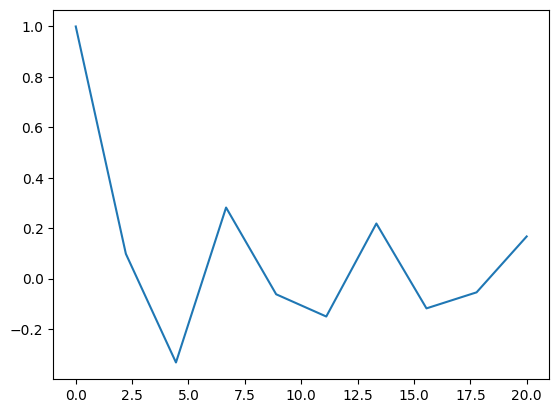

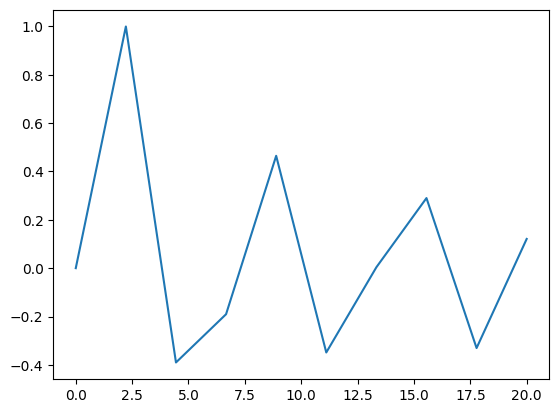

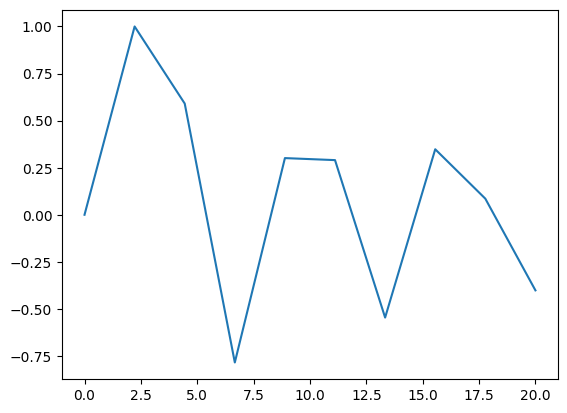

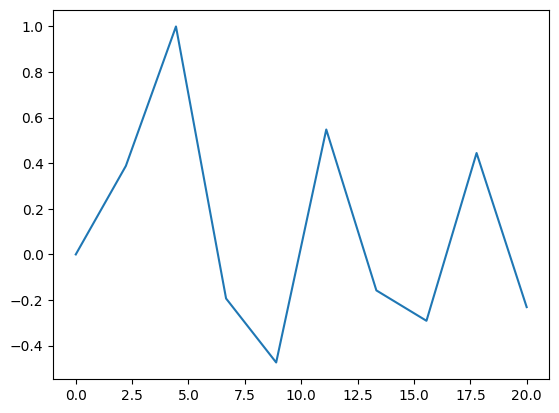

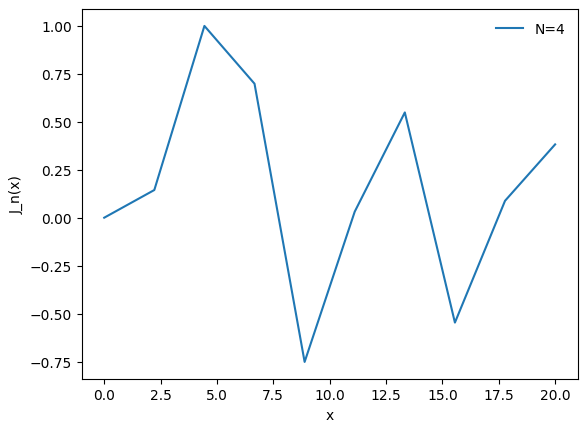

In [2]:
# Numerical integration

# Use the integral definition of the Bessel function J_n (read "Bessel's integrals" here 
# (https://en.wikipedia.org/wiki/Bessel_function) and calculate their values for
# n = 1, 2, 3 and 4. You can use any of the methods for integration.
# Then plot them.

import scipy.integrate

n_points = 10
x = np.linspace(0, 20, n_points) # Use this array as the points at which the function is sampled

# Insert definition of the function here
def bessel(x: np.ndarray, order: int = 1) -> np.ndarray:
    # calculate multiplier before integration
    factor = 1. / np.pi
    
    # create empty list
    result = []
    
    # loop over all values in x
    for i in x:
        
        # create a lambda function for what is being integrated
        integrand = lambda t: np.cos(order * t - i * np.sin(t))
        
        
        # get result for individual entry
        value = scipy.integrate.quad(integrand, 0, np.pi)[0] * factor        
        # append value to result lsit
        result.append(value)
        
    # return normalised result
    return np.array(result) / max(result)

# 
for y in range(0, 5):
    J = bessel(x, order=y)
    fig,ax = plt.subplots()
    ax.plot(x, J, label=f"N={y}")
    
# format axes
ax.set_xlabel('x')
ax.set_ylabel('J_n(x)')
ax.legend(frameon=False)

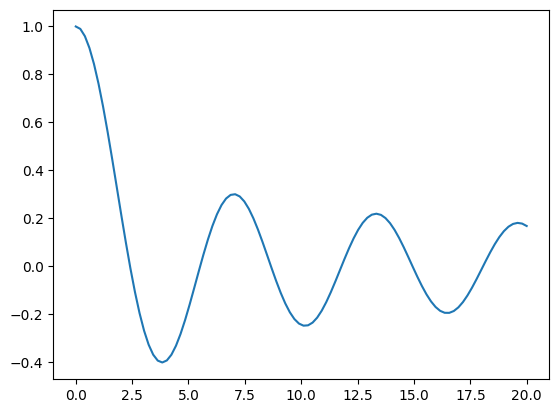

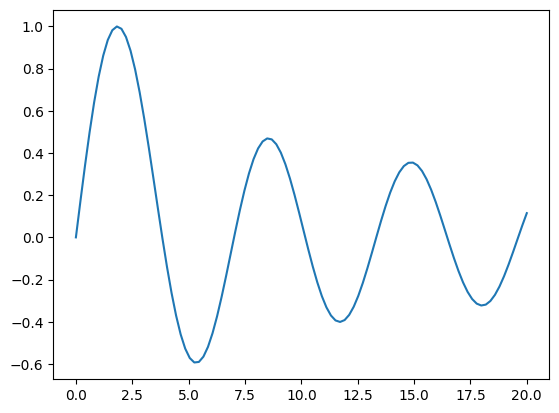

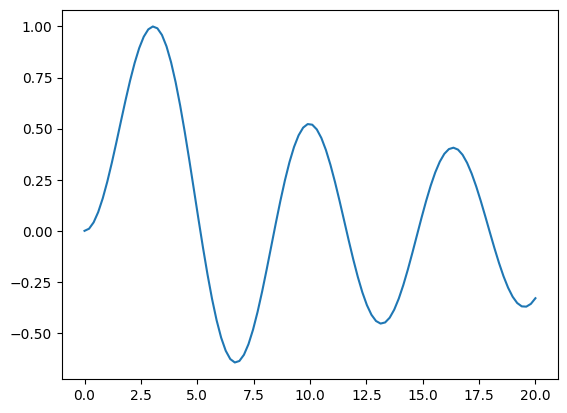

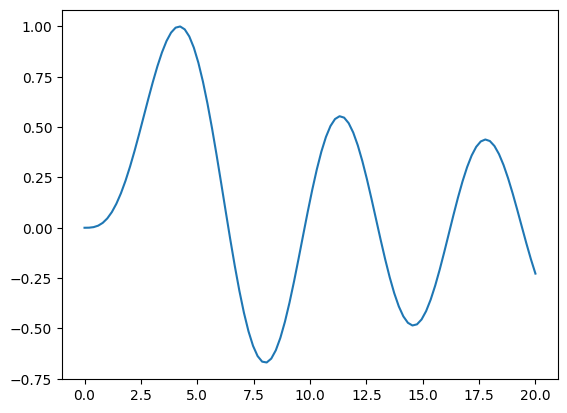

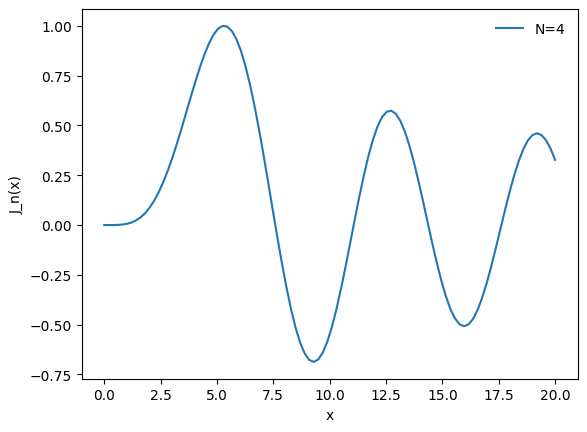

In [3]:
# Repeat the previous exercise using different values of nPoints and plot the result
n_points = 100
x = np.linspace(0, 20, n_points) # Use this array as the points at which the function is sampled
for y in range(5):
    J = bessel(x, order=y)
    fig,ax = plt.subplots()
    ax.plot(x, J, label=f"N={y}")
    
# format axes
ax.set_xlabel('x')
ax.set_ylabel('J_n(x)')
ax.legend(frameon=False)

In [5]:
# Solve the following linear system using numpy's linear algebra package, then do it 
# by hand. Do you obtain the correct solution?

# 3x + 4y + 5z + 2w = 0
# 2x + 2y + z - w = 1
# 3x - 2y + 5z + 2w = 2
# x + y + z - w = 3

# create array
array = np.array([3,4,5,2,2,2,1,-1,3,-2,5,2,1,1,1,-1]).reshape(4,4)
print(array)
results = np.array([
    0, 1, 2, 3
])

# do calculation
xyzw = np.linalg.solve(array, results)

for i, name in enumerate(['x', 'y', 'z', 'w']):
    print(f"{name}: {xyzw[i]}")
    

[[ 3  4  5  2]
 [ 2  2  1 -1]
 [ 3 -2  5  2]
 [ 1  1  1 -1]]
x: -1.6666666666666672
y: -0.3333333333333333
z: 2.3333333333333335
w: -2.6666666666666665


C:\Users\vladimir jurien\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


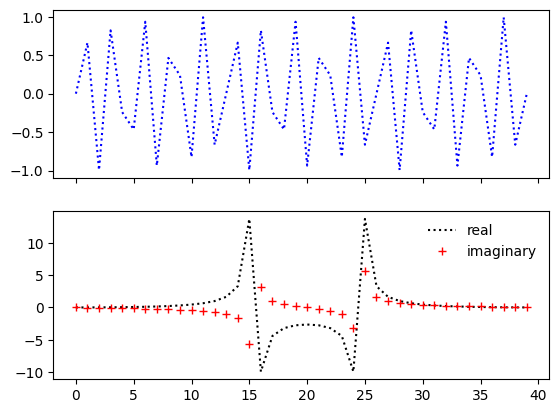

In [12]:
# Calculate and plot the Fourier Transform of the following discrete time series. 
# Question: can you guess what the function was?
t = np.linspace(0, 10, 40)

a, b = 2 * np.pi * 0.5, 2 * np.pi

ft = [0.0, 0.6631226582407954, -0.9927088740980541, 0.8229838658936557, 
      -0.23931566428755635, -0.46472317204377017, 0.9350162426854156, 
      -0.935016242685414, 0.46472317204376595, 0.239315664287561, 
      -0.8229838658936585, 0.9927088740980535, -0.6631226582407919, 
      -4.777360477947854e-15, 0.6631226582407991, -0.9927088740980542, 
      0.822983865893653, -0.23931566428754827, -0.4647231720437744, 
      0.935016242685416, -0.9350162426854123, 0.46472317204375857, 
      0.23931566428756562, -0.8229838658936591, 0.992708874098053, 
      -0.6631226582407856, -9.554720955895708e-15, 0.6631226582408, 
      -0.9927088740980552, 0.8229838658936484, -0.23931566428755396, 
      -0.4647231720437755, 0.9350162426854189, -0.9350162426854093, 
      0.4647231720437512, 0.239315664287553, -0.8229838658936639, 
      0.9927088740980502, -0.6631226582407901, -1.0779367755043061e-14]

# create two stacked plots
fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(ft, 'b:')

# Calculate the fourier tranform using FFT
import scipy.fft
array = np.array(ft)
ft = scipy.fft.fft(array)


# Plot the transform as in the notes: what do you see?
ax[1].plot(ft, 'k:', label='real')
ax[1].plot(ft.imag, 'r+', label='imaginary')
ax[1].legend(frameon=False)
None